In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

## EDA

In [221]:
df = pd.read_csv('birth analysis.csv')
df.head()

,count,day,month,year
0,6166,21,5,2018
1,6026,14,6,2018
2,10397,7,7,2018
3,6864,22,9,2018
4,7917,15,10,2018


In [222]:
df.describe() # get brief describtion about the dataset

,count,day,month,year
count,2302.000000,2302.000000,2302.000000,2302.000000
mean,6031.269331,15.679409,6.323197,2020.668549
std,2175.021764,8.791402,3.489199,1.827182
min,611.000000,1.000000,1.000000,2018.000000
25%,4995.750000,8.000000,3.000000,2019.000000
50%,5775.000000,16.000000,6.000000,2021.000000
75%,6568.000000,23.000000,9.000000,2022.000000
max,33199.000000,31.000000,12.000000,2024.000000


- the differnce between the 'count' min and max is huge
- the mean of the 'count' is very near to the median which could indicates normal distribution
- the 'year' is from 2018 to 2024, which means there is 7 years of data


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   2302 non-null   int64
 1   day     2302 non-null   int64
 2   month   2302 non-null   int64
 3   year    2302 non-null   int64
dtypes: int64(4)
memory usage: 72.1 KB


- there is no missing data
- the data type of the columns is "int"



In [224]:
df['date']= pd.to_datetime(df[['year', 'month', 'day']])
df.head()

,count,day,month,year,date
0,6166,21,5,2018,2018-05-21
1,6026,14,6,2018,2018-06-14
2,10397,7,7,2018,2018-07-07
3,6864,22,9,2018,2018-09-22
4,7917,15,10,2018,2018-10-15


- new column which is named 'date' which will be in datetime format to make things easier


In [225]:
df.dtypes
# to confirm the change

count             int64
day               int64
month             int64
year              int64
date     datetime64[ns]
dtype: object

In [226]:
new_df = df.drop(columns=['day', 'month', 'year']) # making new df with the new 'date' column and 'count' only
new_df.sort_values('date', inplace=True) # sorting the values using the 'date' column
new_df.reset_index(inplace=True, drop=True)
new_df.head()


,count,date
0,33199,2018-01-01
1,5111,2018-01-02
2,5970,2018-01-03
3,6413,2018-01-04
4,5408,2018-01-05


In [227]:
new_df['month'] = new_df['date'].dt.strftime('%#m')  # Month number without leading zero
new_df['month_name'] = new_df['date'].dt.strftime('%b')  # Abbreviated month name
new_df['day'] = new_df['date'].dt.strftime('%#d')  # Day of the month without leading zero
new_df['day_name'] = new_df['date'].dt.strftime('%a')  # Abbreviated weekday name
new_df['quarter'] = new_df['date'].dt.quarter # Extracting the quarter number
new_df['year'] = new_df['date'].dt.strftime('%Y')  # year




In [228]:
new_df.head()

,count,date,month,month_name,day,day_name,quarter,year
0,33199,2018-01-01,1,Jan,1,Mon,1,2018
1,5111,2018-01-02,1,Jan,2,Tue,1,2018
2,5970,2018-01-03,1,Jan,3,Wed,1,2018
3,6413,2018-01-04,1,Jan,4,Thu,1,2018
4,5408,2018-01-05,1,Jan,5,Fri,1,2018


In [229]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   count       2302 non-null   int64         
 1   date        2302 non-null   datetime64[ns]
 2   month       2302 non-null   object        
 3   month_name  2302 non-null   object        
 4   day         2302 non-null   object        
 5   day_name    2302 non-null   object        
 6   quarter     2302 non-null   int32         
 7   year        2302 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(5)
memory usage: 135.0+ KB


In [230]:
new_df['month'] = new_df['month'].astype(int) 
new_df['day'] = new_df['day'].astype(int)
new_df['year'] = new_df['year'].astype(int)

In [231]:

# Remove all rows where the year is 2024
cleaned = new_df[new_df['year'] != 2024]

# Optionally, reset the index after removing the rows
cleaned.reset_index(drop=True, inplace=True)

# Display the first few rows to confirm
print(cleaned.head())


   count       date  month month_name  day day_name  quarter  year
0  33199 2018-01-01      1        Jan    1      Mon        1  2018
1   5111 2018-01-02      1        Jan    2      Tue        1  2018
2   5970 2018-01-03      1        Jan    3      Wed        1  2018
3   6413 2018-01-04      1        Jan    4      Thu        1  2018
4   5408 2018-01-05      1        Jan    5      Fri        1  2018


In [232]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   count       2191 non-null   int64         
 1   date        2191 non-null   datetime64[ns]
 2   month       2191 non-null   int32         
 3   month_name  2191 non-null   object        
 4   day         2191 non-null   int32         
 5   day_name    2191 non-null   object        
 6   quarter     2191 non-null   int32         
 7   year        2191 non-null   int32         
dtypes: datetime64[ns](1), int32(4), int64(1), object(2)
memory usage: 102.8+ KB


# Exploring the target feature ' count '

<Axes: xlabel='count', ylabel='Count'>

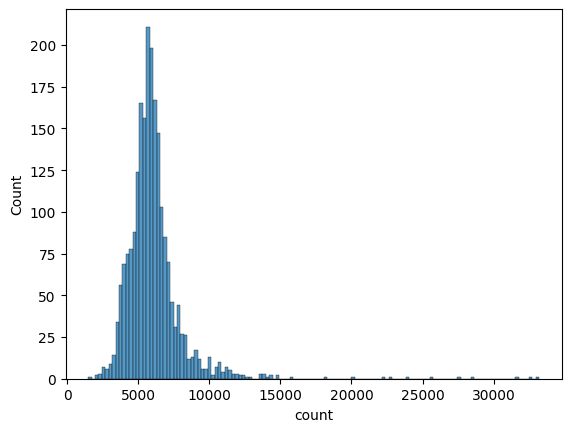

In [233]:
sns.histplot(x=cleaned['count'])

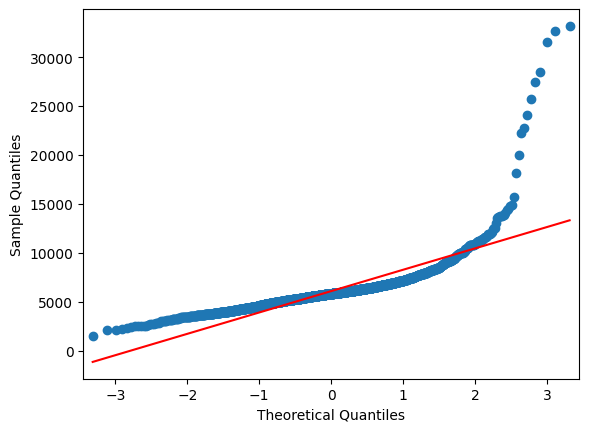

In [234]:
sm.qqplot(
  data = cleaned['count'], line='s'
)
plt.show()

- the count seems to be right skewed, which means most of the 'count' is concentrated more on the left side , while fewer observations extends into much higher values.
- since the 'count' is right skewed this could mean that there are few days with very high numbers of birth.

------------------

## visual analysis

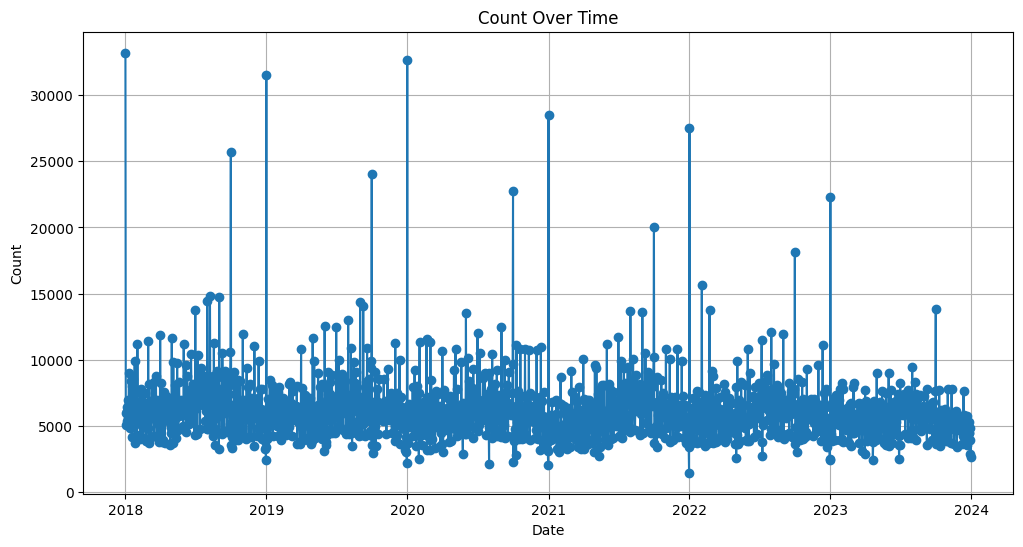

In [235]:

# Plot count over time
plt.figure(figsize=(12, 6))
plt.plot(cleaned['date'], cleaned['count'], marker='o', linestyle='-')
plt.title('Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()


- The graph shows that most of the daily birth counts range between 5,000 and about 9,000 births per day.
- Each year displays two distinct peaks:
  - The first peak occurs at the start of the year (January).
  - The second peak is observed between August and October.
  - These two peaks warrant further analysis to understand their underlying causes.

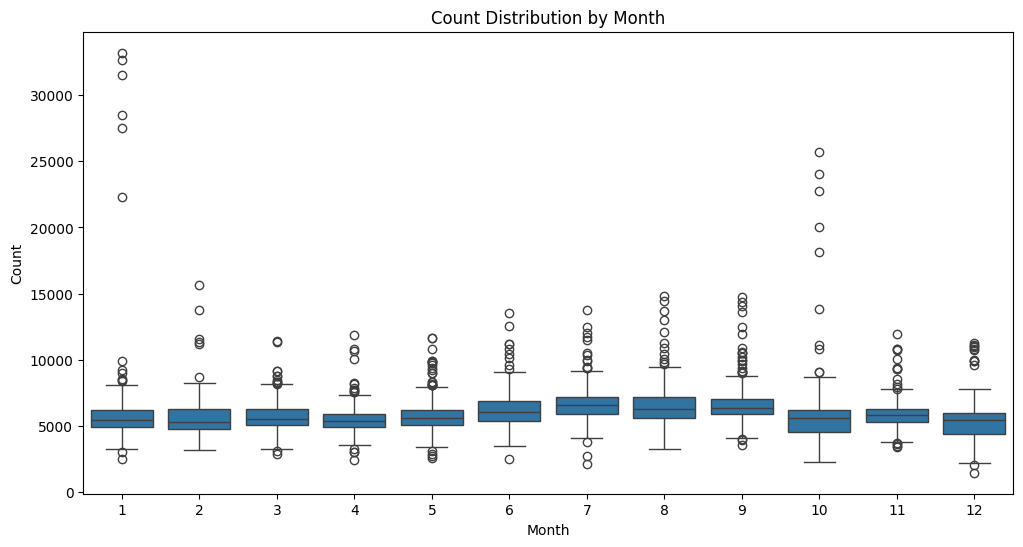

In [236]:
import seaborn as sns

# Box plot for count by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='count', data=cleaned)
plt.title('Count Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()



- this box plot shows that in average the summer month (june , july and august) have higher daily births
- the box plot also indicates that there is very high outliers in jan and october , which supports the first graphs with 2 peaks per year.
- the high increase in january and october could indicate seasonal or cultural trends.
- the median number of births is relatively consistent across most months, with slight increase/decrease in few months

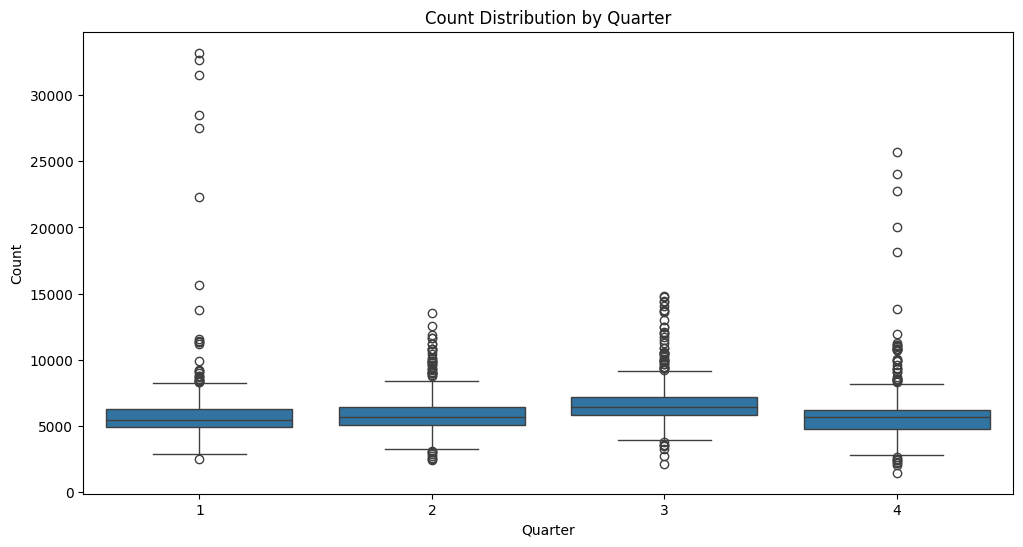

In [237]:
# Box plot for count by quarter
plt.figure(figsize=(12, 6))
sns.boxplot(x='quarter', y='count', data=cleaned)
plt.title('Count Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.show()


- the main insight from this box plot is that the third quarter of the year ( july , august and septemper) have higher birth rates than the the other 3 quarters.

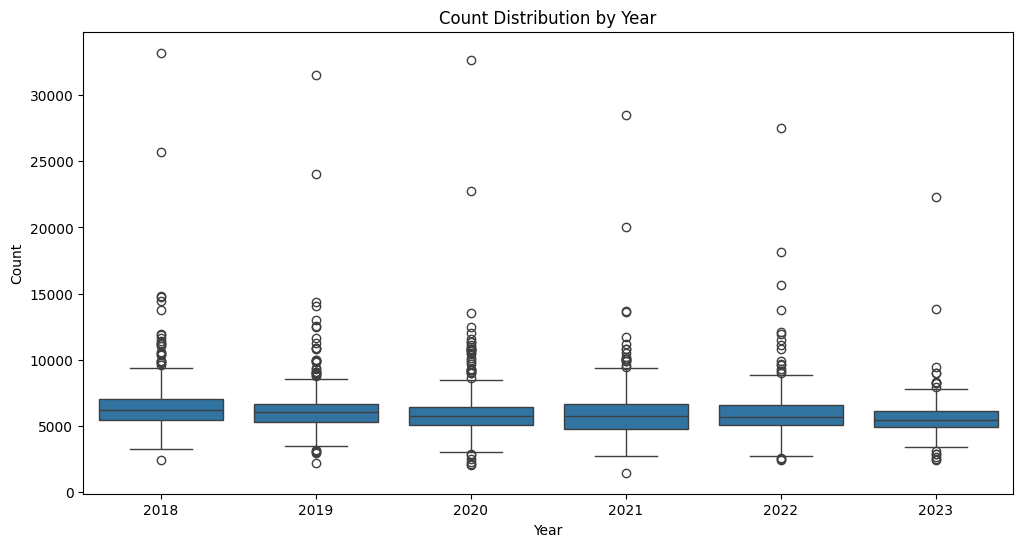

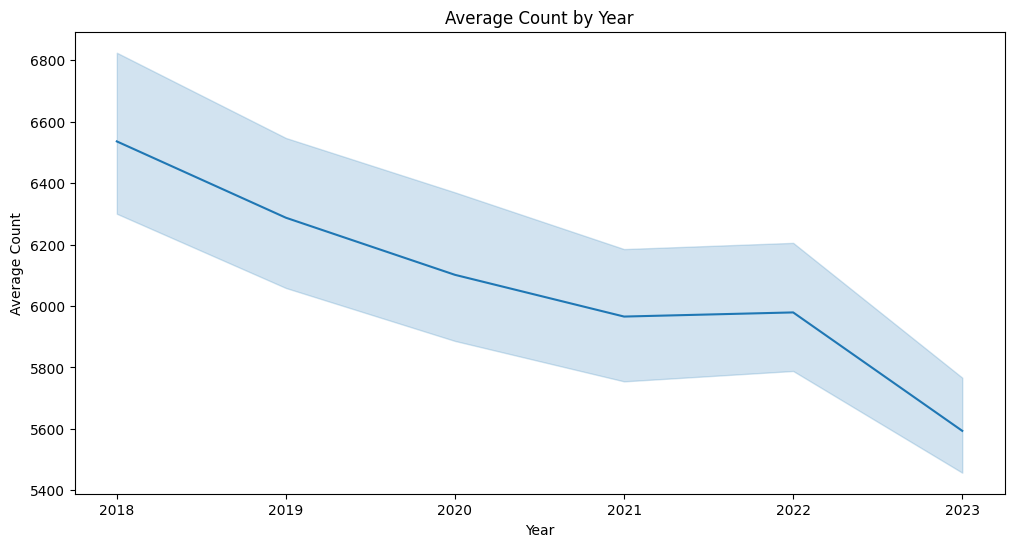

In [238]:
# Box plot for count by year
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='count', data=cleaned)
plt.title('Count Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Line plot for count over years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='count', data=cleaned, estimator='mean')
plt.title('Average Count by Year')
plt.xlabel('Year')
plt.ylabel('Average Count')
plt.show()


- the 2 plots indicates that avergae birth in Egypt is decreasing from 2018 until 2024.
- this could be due to many reasons such as the rising cost of living and a shift towards later marriage ages.
- another reason is the National project for Egyptian family development (المشروع القومي  لتنميه الاسره)
-  another main reason starting from 2019 is COVID , which was a direct reason to many deaths

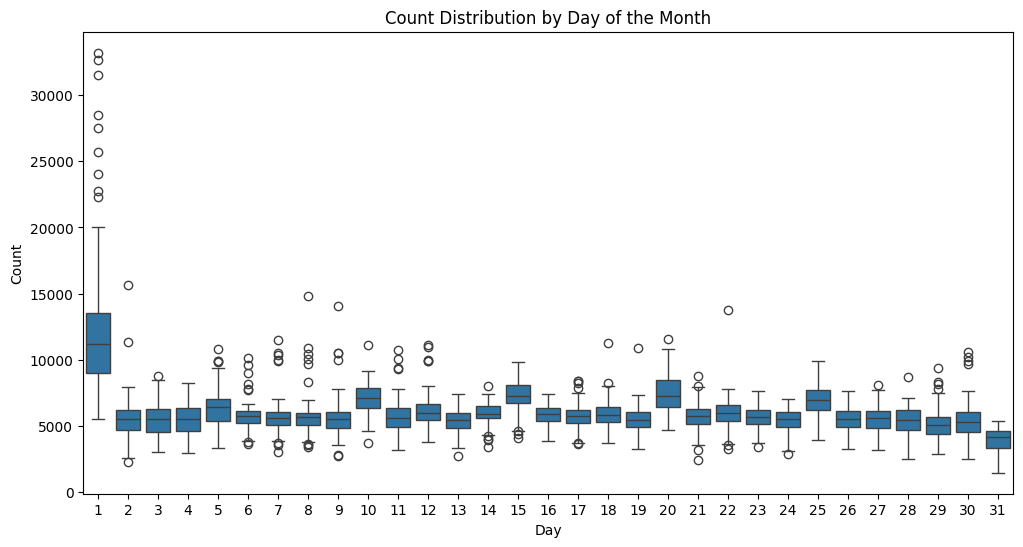

In [239]:
# Box plot for count by day of the month
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='count', data=cleaned)
plt.title('Count Distribution by Day of the Month')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()


- The graph shows that the first day of any month has the highest number of birth registrations. This trend makes sense because births that occur towards the end of the month, typically in the last two or three days, are often registered on the first day of the following month. The data supports this observation, as the 31st day consistently has the fewest birth registrations, further suggesting that many people choose to register births on the 1st of the next month.


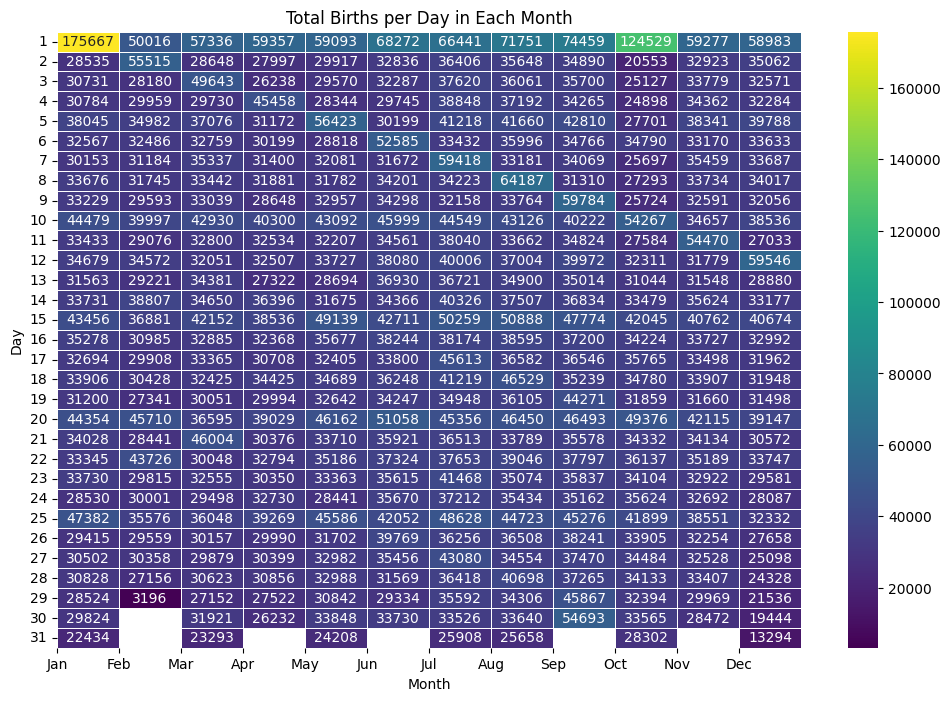

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming new_df is your DataFrame and 'month', 'day', and 'count' are columns

# Aggregate the data: sum of counts for each day in each month
daily_counts = cleaned.groupby(['month', 'day'])['count'].sum().reset_index()

# Pivot the data to create a matrix for the heatmap
pivot_table = daily_counts.pivot(index='day', columns='month', values='count')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)

# Customize the plot
plt.title('Total Births per Day in Each Month')
plt.xlabel('Month')
plt.ylabel('Day')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(rotation=0)
plt.show()




- January 1st and  October 1st These peaks are attributed to specific registration practices and educational policies.

- Insight 1: Peak on January 1st
- Observation:
A notable peak is observed on January 1st each year. This peak is largely due to the practice of registering births that occurred in the last few days of December on January 1st.

- Explanation:
In many regions, administrative procedures or delays in processing can result in births from late December being officially recorded in the new year. This results in an artificially high number of registrations on January 1st, reflecting births that happened just before the year ended.

- Insight 2: Peak on October 1st
- Observation:
Another significant peak occurs on October 1st. This peak is associated with the educational registration system in Egypt.

- Explanation:
In Egypt, children born between October 1st and October 15th are registered on October 1st. This is due to the educational system's policy where children born after October 15th must wait an additional year to start school. As a result, parents often register their children earlier to avoid this delay. Consequently, this practice results in a noticeable spike in registrations on October 1st.

In [249]:

# Aggregate the data to get the sum of counts per year
yearly_births = cleaned.groupby('year')['count'].sum().reset_index()

# Rename columns for clarity
yearly_births.columns = ['year', 'total_births']

# Display the DataFrame
yearly_births

,year,total_births
0,2018,2385525
1,2019,2294852
2,2020,2233105
3,2021,2177439
4,2022,2182364
5,2023,2041672


C:\Users\OMAR IBRAHIM\AppData\Local\Temp\ipykernel_17756\1198225575.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=yearly_births['year'], y=yearly_births['total_births'], palette='crest')


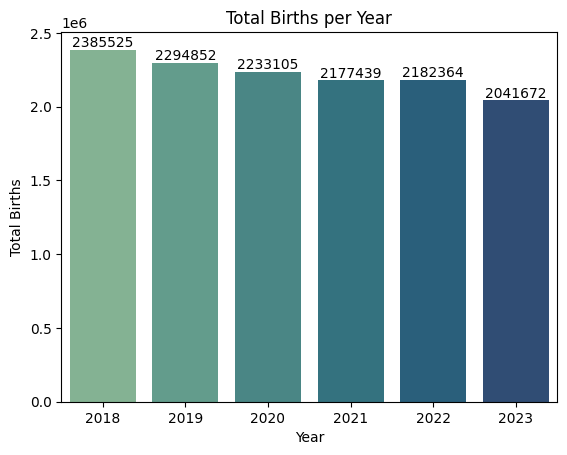

In [265]:
barplot = sns.barplot(x=yearly_births['year'], y=yearly_births['total_births'], palette='crest')

# Add title and labels
plt.title('Total Births per Year')
plt.xlabel('Year')
plt.ylabel('Total Births')

# Annotate each bar with its value
for index, value in enumerate(yearly_births['total_births']):
    barplot.text(index, value + 500, str(value), ha='center', va='bottom')

plt.show()



- main insight here is that births in egypt is decreasing every year and thid will probably continue to decrease for upcoming years